# Introduction
The dataset is from kaggle...

The challenge of this dataset is that the number of shops and the number of items vary slightly with time

In [1]:
import pandas as pd
sales = pd.read_csv("C:/data/sales_train_v2.csv")

In [2]:
sales.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


There are total 60 shops, however, the number of items sold by each shop differ significantly

In [3]:
pd.Series(sales.shop_id.values).unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

In [ ]:
len(list(pd.Series(sales.loc[sales.shop_id==37].item_id.values).unique()))
# 11, 20, 36

In [8]:
len(list(pd.Series(sales.loc[sales.shop_id==1].item_id.values).unique()))
# 11, 20, 36

2523

In [ ]:
len(list(pd.Series(sales.loc[sales.shop_id==37].item_id.values).unique()))
# 11, 20, 36

In [ ]:
len(list(pd.Series(sales.loc[sales.shop_id==37].item_id.values).unique()))
# 11, 20, 36

Below we compare the first 30 items in randomly selected 3 shops. We found that the pattern ...

According to the test set from Kaggle.com, it seems we need to provide predictions for each items in every shop. Hence we first look at the distribution of data and come up with some potential solutions for modeling it.


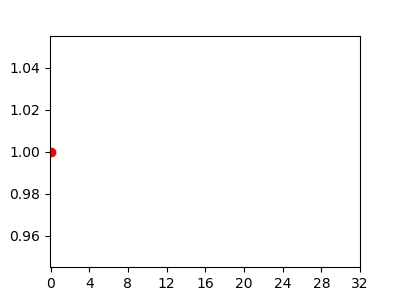
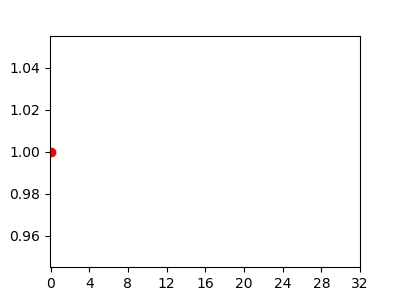
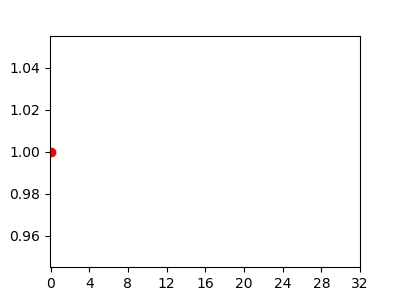
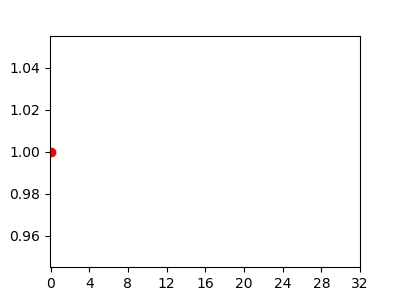
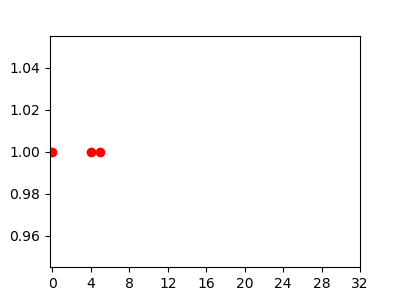
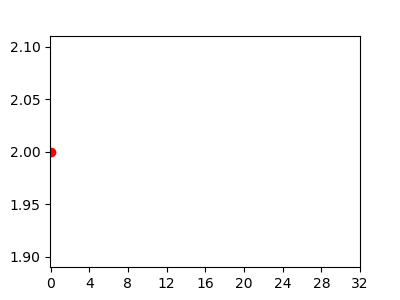
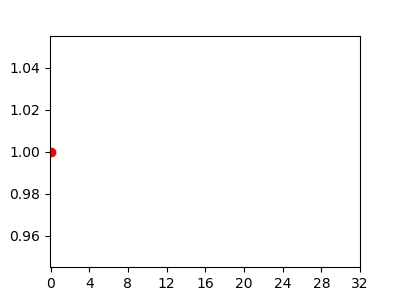
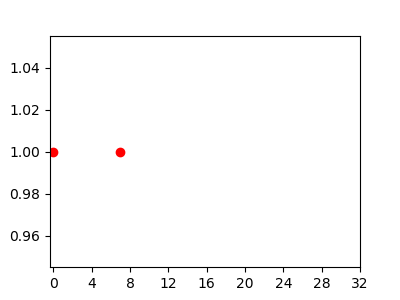
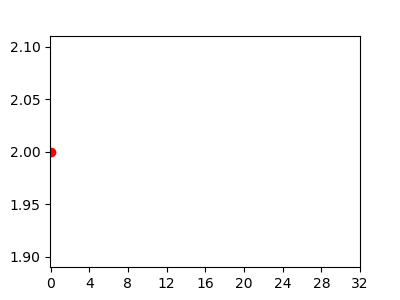
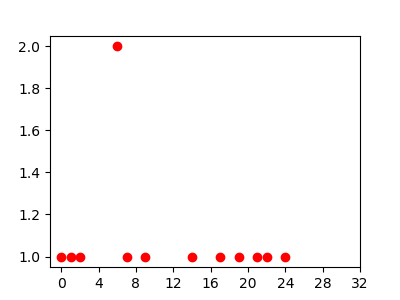
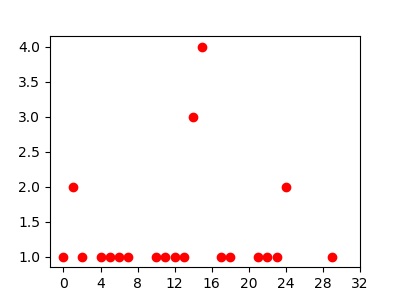
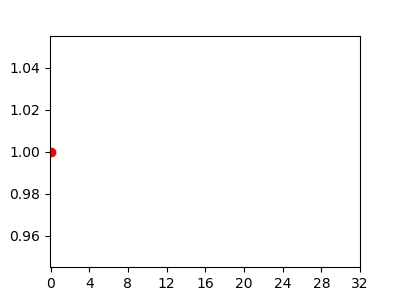
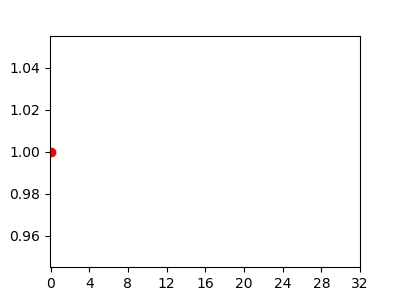
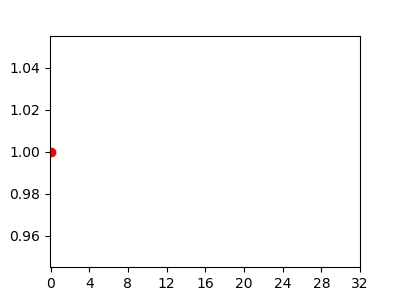
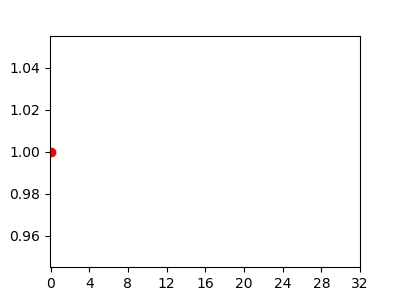
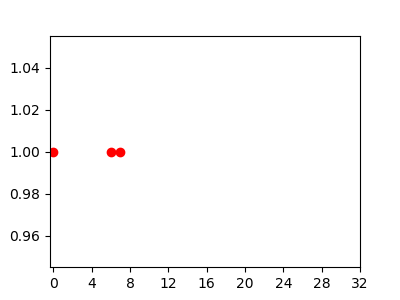
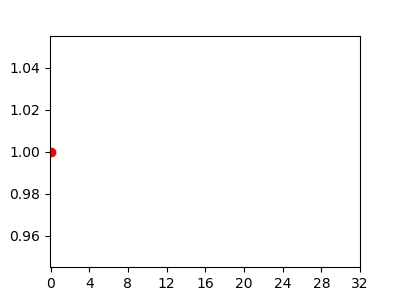
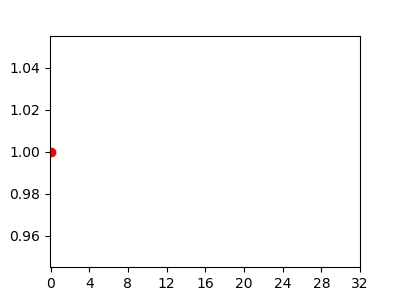
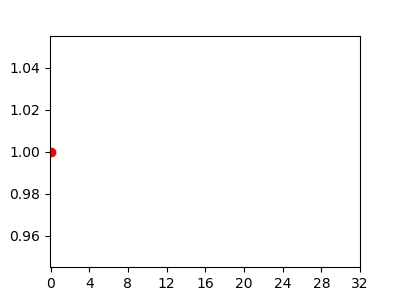
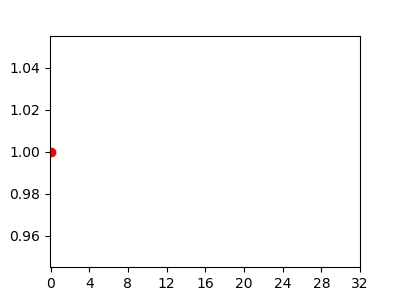
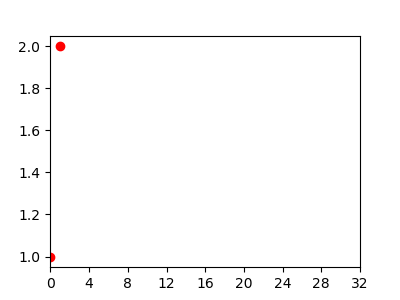
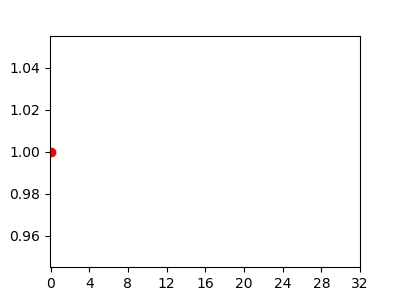
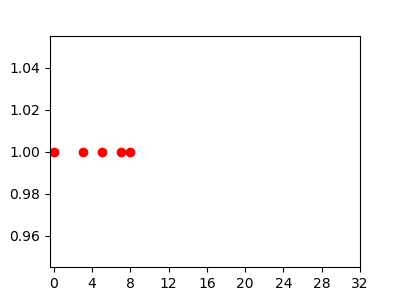
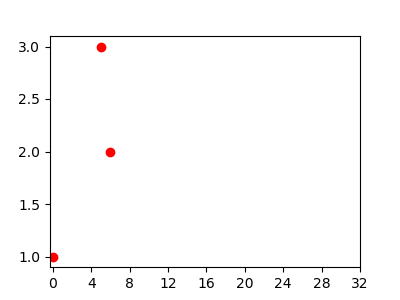
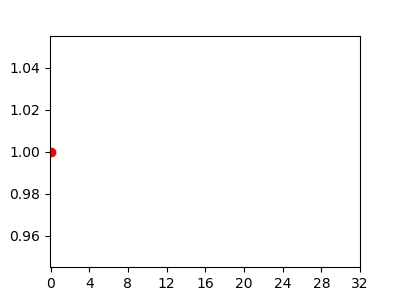
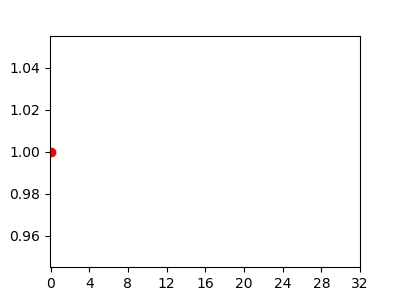
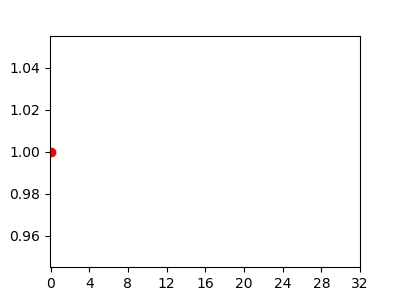
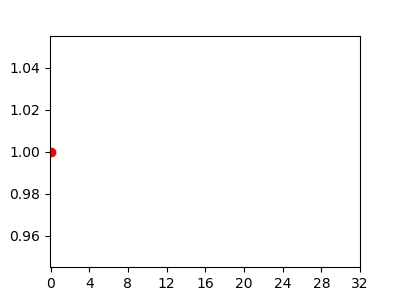
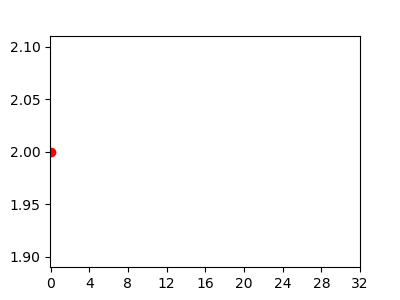
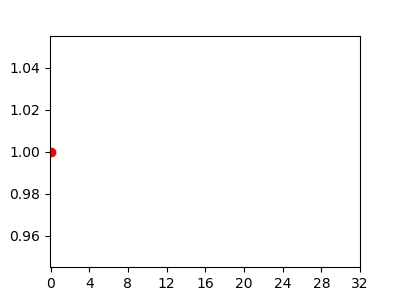
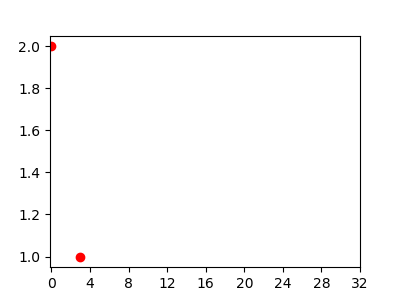
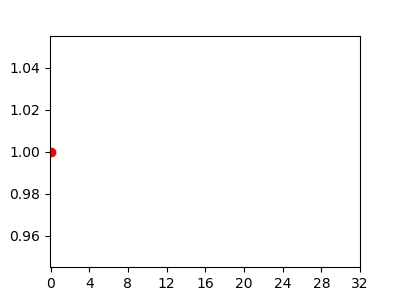
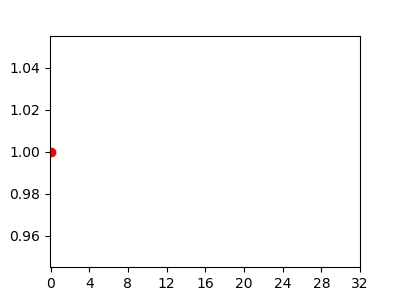
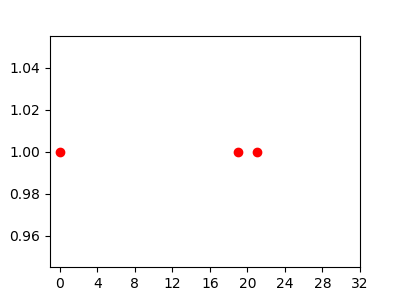
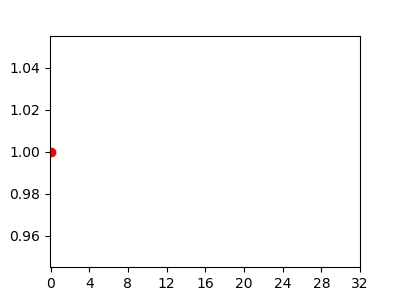
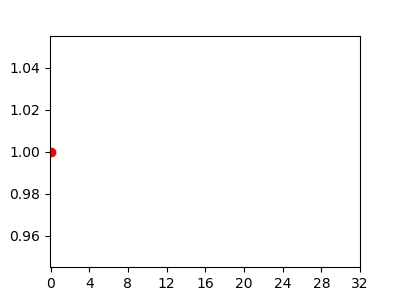
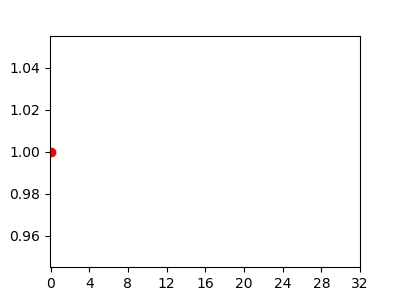
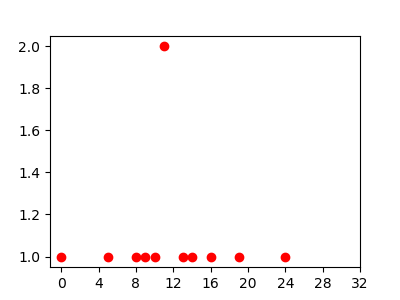
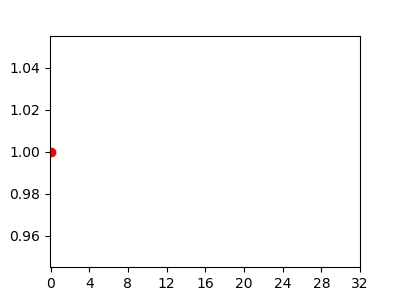

In [2]:
from plots import FlowLayout
 
oPlot = FlowLayout.FlowLayout() # create an empty FlowLayout

import matplotlib.pyplot as plt

#shop_list = list(pd.Series(sales.shop_id.values).unique())
shop_list = [2]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        # print(shop, item)
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))

        oPlot.add_plot(ax)
               
        plt.close()
        if counter == 39: break
        
oPlot.PassHtmlToCell()


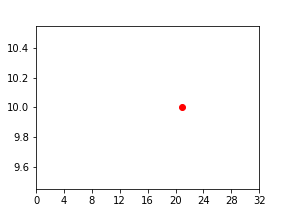
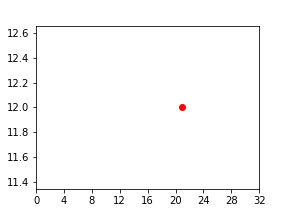
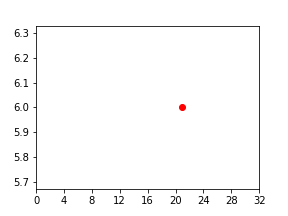
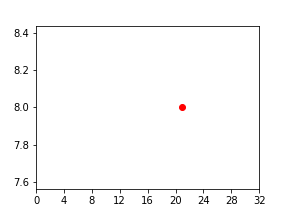
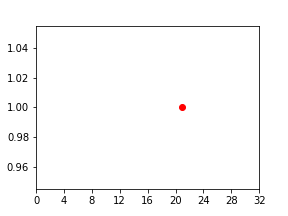
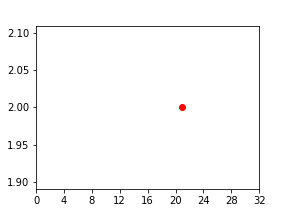
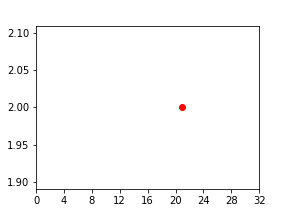
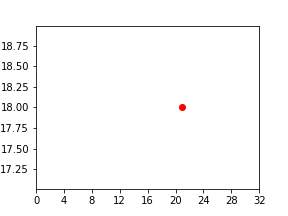
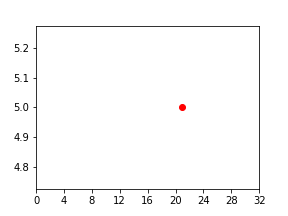
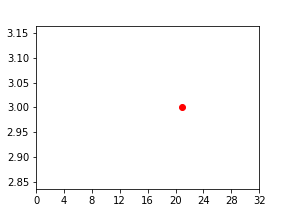
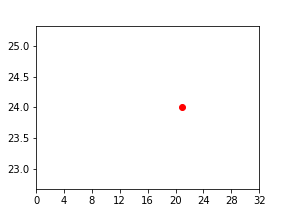
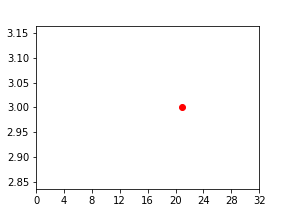
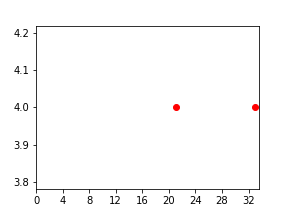
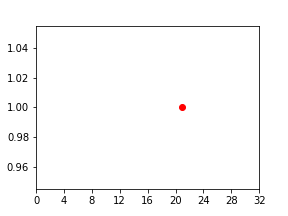
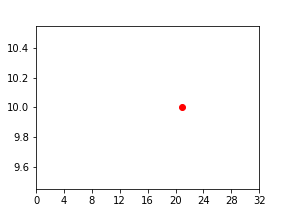
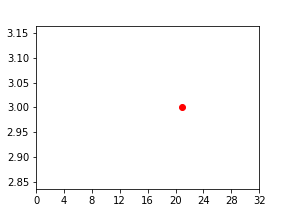
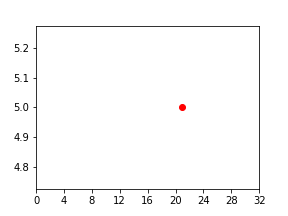
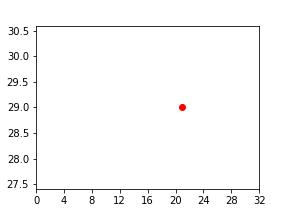
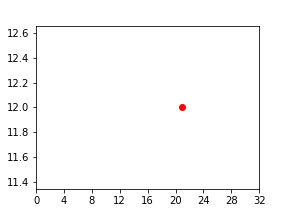
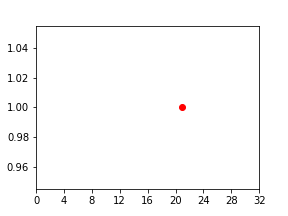
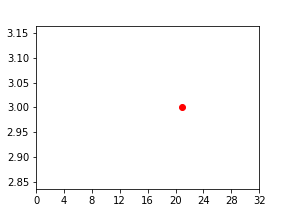
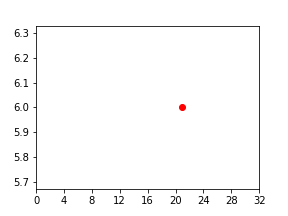
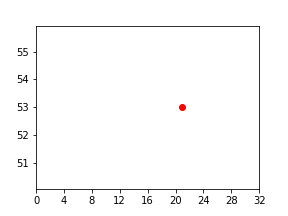
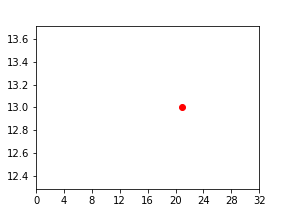
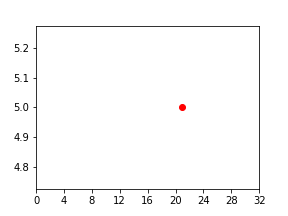
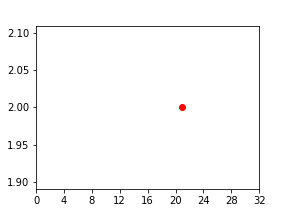
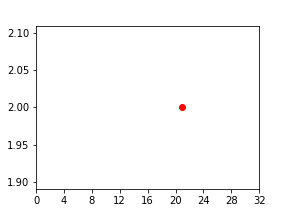
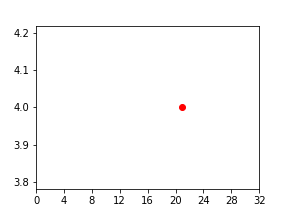
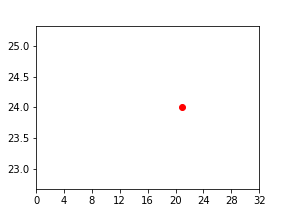
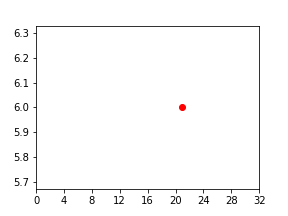
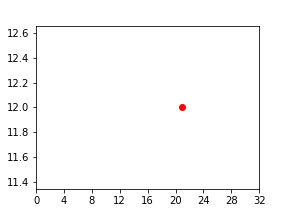
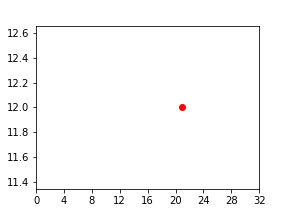
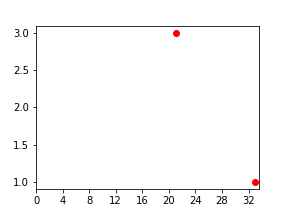
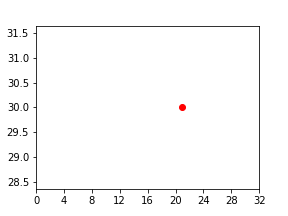
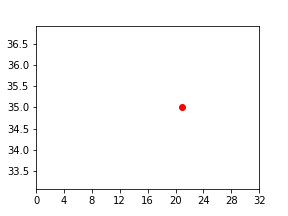
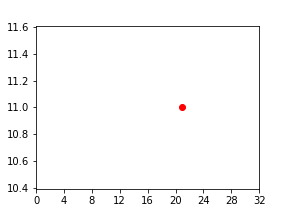
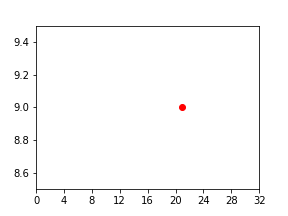
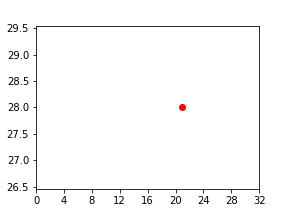
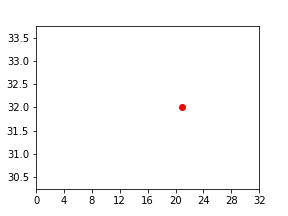

In [3]:
import plots

oPlot = FlowLayout.FlowLayout() # create an empty FlowLayout

import matplotlib.pyplot as plt

#shop_list = list(pd.Series(sales.shop_id.values).unique())
shop_list = [20]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        # print(shop, item)
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))

        oPlot.add_plot(ax)
               
        plt.close()
        if counter == 39: break
        
oPlot.PassHtmlToCell()


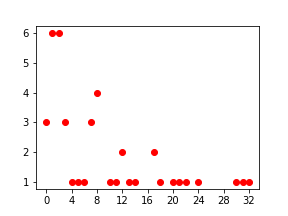
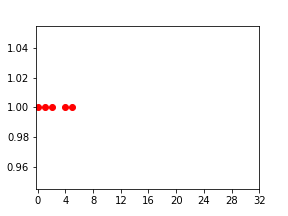
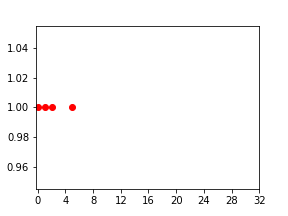
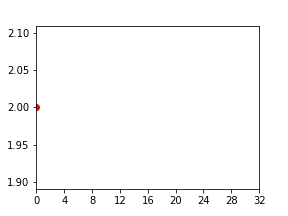
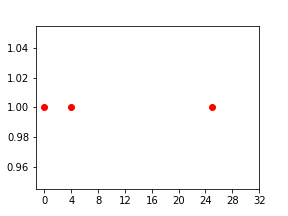
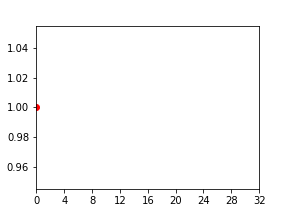
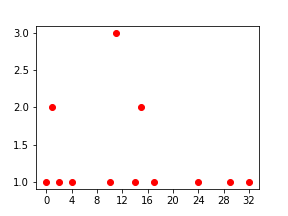
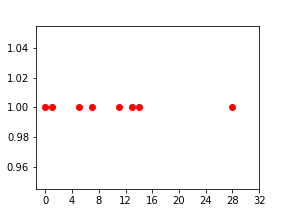
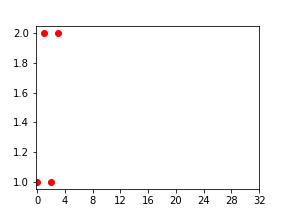
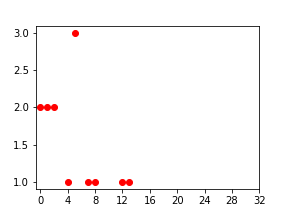
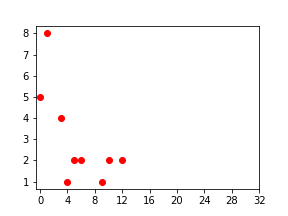
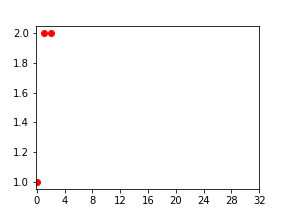
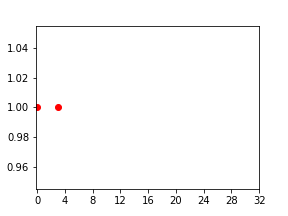
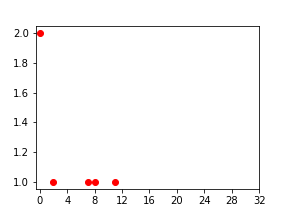
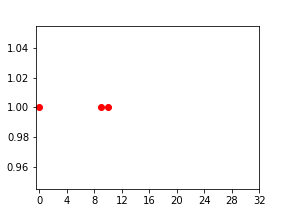
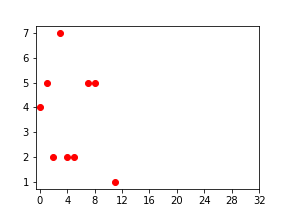
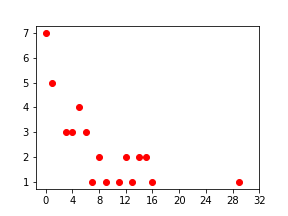
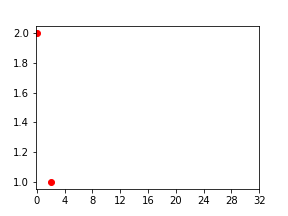
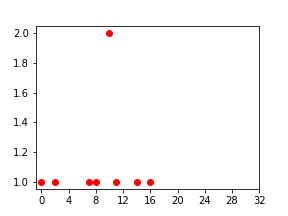
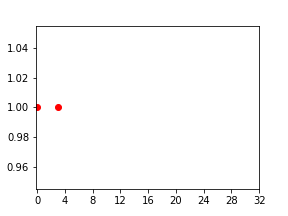
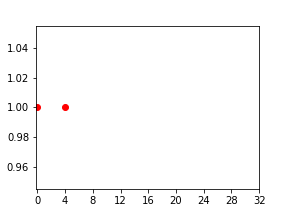
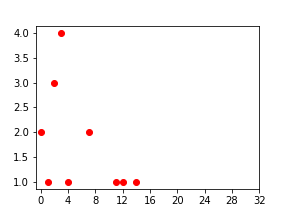
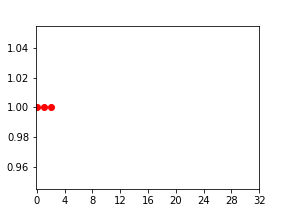
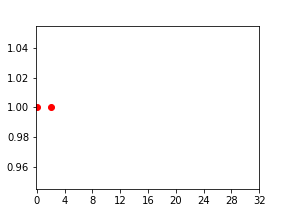
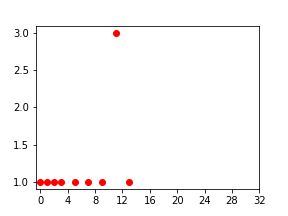
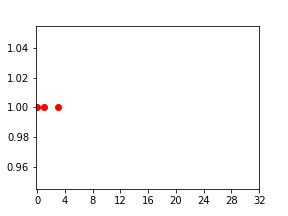
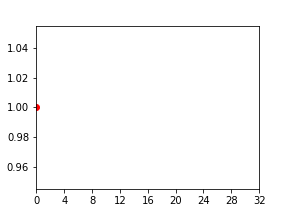
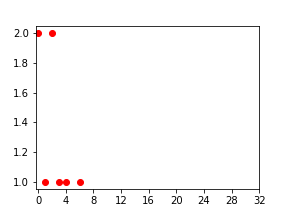
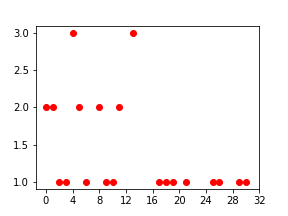
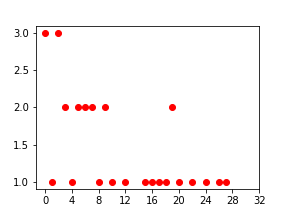
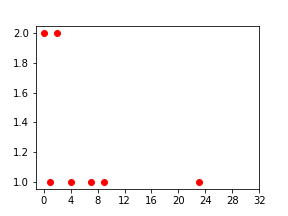
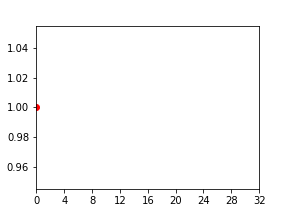
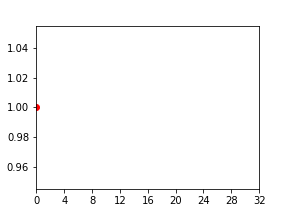
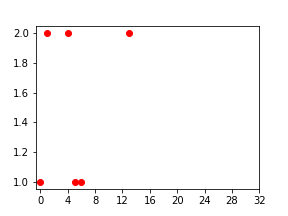
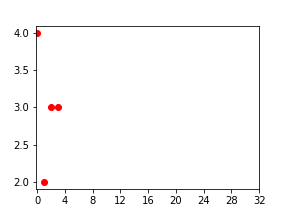
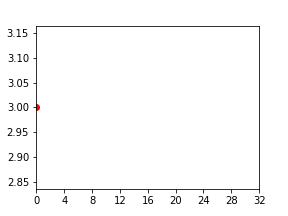
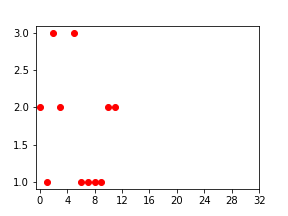
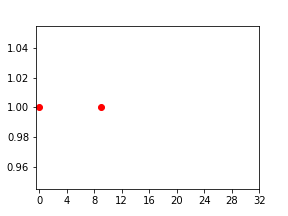
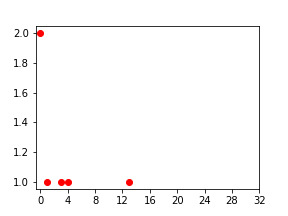

In [12]:
import plots

oPlot = FlowLayout.FlowLayout() # create an empty FlowLayout

import matplotlib.pyplot as plt

#shop_list = list(pd.Series(sales.shop_id.values).unique())
shop_list = [37]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        # print(shop, item)
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))

        oPlot.add_plot(ax)
               
        plt.close()
        if counter == 39: break
        
oPlot.PassHtmlToCell()

We first choose those shop and item combinations with consecutive purchases... and try to model the pattern with RNN LSTM. 